## Домашняя работа
Группа: Т12О-101М-20

Студент: Гриньков Владислав Леонидович

# Задача на регуляризцию

Загрузка данных

In [1]:
# Disable warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


у класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12

In [3]:
# -- ВАШ КОД ТУТ --
parameters = [
    (0.01, 8),
    (0.01, 12)
]
results = {}

for alpha, degree in parameters:
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    
    model = Ridge(alpha=0).fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    
    results[(alpha, degree)] = {}
    results[(alpha, degree)]["mse_validation"] = mean_squared_error(y_valid, y_pred)
    results[(alpha, degree)]["mse_trainig"] = mean_squared_error(y_train, y_pred_train)
    

for alpha, degree in results:
    print(f'Параметры alpha={alpha}, degree={degree}')
    print(f'\tКачество на обучении:', results[(alpha, degree)]['mse_trainig'])
    print(f'\tКачество на валидации:', results[(alpha, degree)]['mse_validation'])
    print()
# ------------------

Параметры alpha=0.01, degree=8
	Качество на обучении: 0.05207484414550292
	Качество на валидации: 0.11911800679352166

Параметры alpha=0.01, degree=12
	Качество на обучении: 0.0511266039426615
	Качество на валидации: 0.12518512766745146



### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

In [4]:
# -- ВАШ КОД ТУТ ---
degreed_data = {
    degree: generate_degrees(data['x_train'], degree)
    for degree in range(1, 9)
}
y = data.y_train.values


trained = {'ridge': {}, 'lasso': {}}

for degree, X in degreed_data.items():
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    
    ridge_model = Ridge(alpha=0.8).fit(X_train, y_train)
    lasso_model = Lasso(alpha=0.8).fit(X_train, y_train)

    trained['ridge'][degree] = ridge_model
    trained['lasso'][degree] = lasso_model


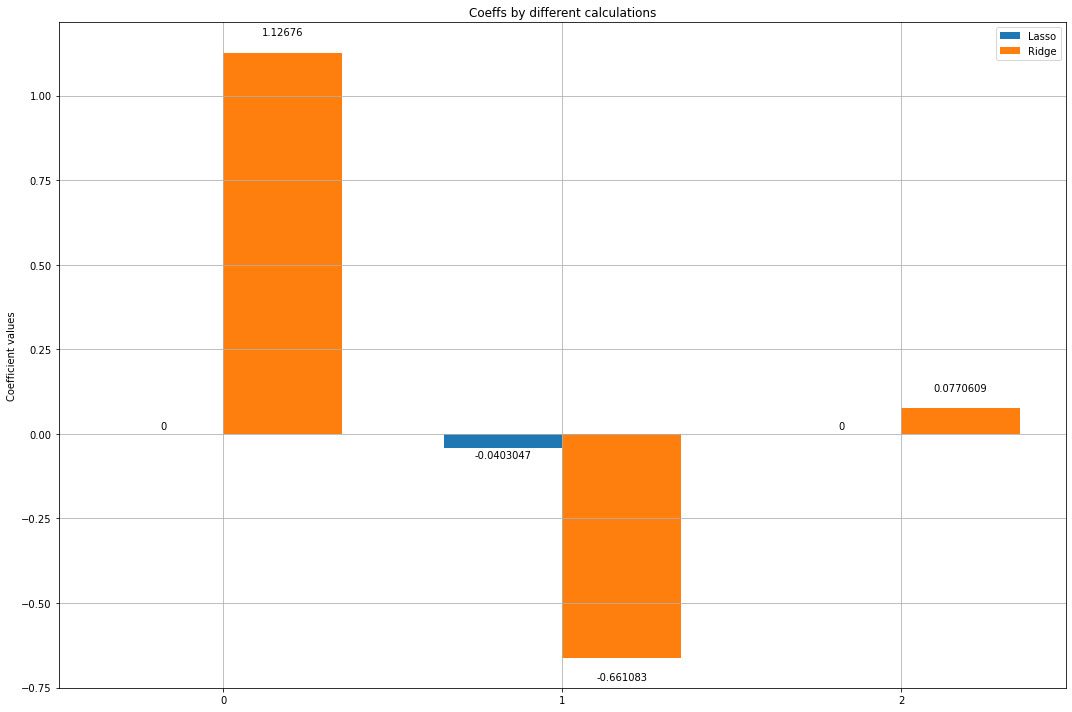

In [5]:
from matplotlib import pyplot as plt

degree = 3

lasso = trained['lasso'][degree].coef_
ridge = trained['ridge'][degree].coef_

x = np.arange(degree)
width = 0.35

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, lasso, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge, width, label='Ridge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient values')
ax.set_title('Coeffs by different calculations')
ax.set_xticks(x)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=15)

fig.tight_layout()
# ------------------

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [6]:
# -- ВАШ КОД ТУТ --

# Prepare data
degree = 8
k = 8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# Make calculations
def ridge_coeffs(k, X, y):
    E = np.eye(k)
    w = np.linalg.inv(X.T.dot(X) + k*E).dot(X.T).dot(y)
    return w

ridge_coeffs(k, X_train, y_train)
# -----------------

array([ 0.51152727,  0.40716153,  0.22421288, -0.04867427, -0.17822689,
        0.08659551, -0.01446891,  0.00083008])

# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

In [8]:
data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [9]:
def train_sgd(
    X_train, y_train,
    X_test, y_test,
    K: int,
    rand_state: int,
    eta: float,
    epsilon: float,
    metric,
    max_iterations: int = 800,
):
    sgd = SGDRegressor(
        learning_rate='constant',
        eta0=eta,
        fit_intercept=True,
        random_state=rand_state
    )

    # инициализация весов случайным образом
    w_current = np.random.random(K)
    # изменения весов и ошибка на валидации
    weight_evolution, metric_evolution = [], []

    for step in range(max_iterations):
        # шаг градиентного спуска
        sgd = sgd.partial_fit(X_train, y_train)
        
        # отслеживаем изменения весов
        weight_evolution.append(distance.euclidean(w_current, sgd.coef_))

        # проверяем критерий остановки
        if weight_evolution[-1] < epsilon:
            break

        metric_evolution.append(metric(y_test, sgd.predict(X_test)))

        # обновление весов регрессии
        w_current = sgd.coef_.copy()

    return sgd, step, metric_evolution

In [10]:
# -- ВАШ КОД ТУТ --
from sklearn.linear_model import SGDRegressor

EPS = 0.0001
STATE = 12
K = 2

etas = [0.009, 0.010, 0.015, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050]

num_iters = {}

for eta in etas:
    sgd_regressor, steps, rmse_evolution = train_sgd(
        X_train, y_train,
        X_valid, y_valid,
        K=K,
        rand_state=STATE,
        eta=eta,
        epsilon=EPS,
        metric=mean_squared_error,
    )
    num_iters[eta] = (steps, rmse_evolution, sgd_regressor)
# ----------------

In [11]:
solution_with_minimal_steps = min(num_iters.items(), key=lambda x: x[1][1])
eta, (steps, rsme_evolution, sgd_regessor) = solution_with_minimal_steps

print(f'Solution with minimal steps when eta0 = {eta}')
print(f'Steps used with this eta -> {steps}')

Solution with minimal steps when eta0 = 0.05
Steps used with this eta -> 52


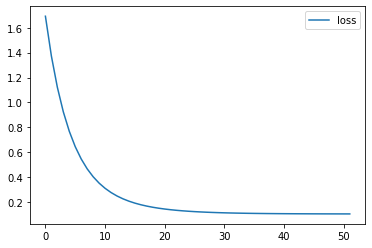

In [12]:
plt.plot(range(steps), rsme_evolution, label='loss')
plt.legend()

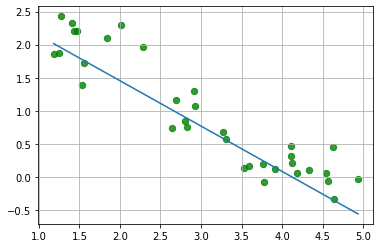

In [13]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regessor.predict(x_linspace.reshape(-1,1))

plt.grid(True)
plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [16]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, y_train.shape

((404, 13), (404,))

In [17]:
reg = SGDRegressor(random_state=10).fit(X_train, y_train)
reg.n_iter_, r2_score(reg.predict(X_test), y_test)

(105, -0.21077613603857315)

# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [18]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD

In [19]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    # NOTE: chages here ... added : `+ 2 * X`
    error = (y - y_hat) + 2 * X
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.04718, grad=[ 5.66601028 -1.63679773]
step 200 |w-w_next|=0.03883, grad=[ 4.66270609 -1.34696304]
step 300 |w-w_next|=0.03195, grad=[ 3.83706116 -1.10845064]
step 400 |w-w_next|=0.02629, grad=[ 3.15761664 -0.91217264]
step 500 |w-w_next|=0.02164, grad=[ 2.59848422 -0.7506504 ]
step 600 |w-w_next|=0.01781, grad=[ 2.13835972 -0.61772959]
step 700 |w-w_next|=0.01465, grad=[ 1.75971139 -0.50834562]
step 800 |w-w_next|=0.01206, grad=[ 1.44811191 -0.41833073]
step 900 |w-w_next|=0.00992, grad=[ 1.19168866 -0.34425515]
step 1000 |w-w_next|=0.00817, grad=[ 0.98067135 -0.28329645]
step 1100 |w-w_next|=0.00672, grad=[ 0.80701976 -0.23313196]
step 1200 |w-w_next|=0.00553, grad=[ 0.66411739 -0.1918503 ]
step 1300 |w-w_next|=0.00455, grad=[ 0.54651933 -0.15787856]
step 1400 |w-w_next|=0.00375, grad=[ 0.44974486 -0.12992234]
step 1500 |w-w_next|=0.00308, grad=[ 0.37010665 -0.10691645]
step 1600 |w-w_next|=0.00254, grad=[ 0.30457032 -0.08798431]
step 1700 |w-w_next|=0.00209, gra

# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [20]:
import nltk
import string
import pandas as pd

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

(3904, 3)


[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [21]:
import string
import itertools

stop_words = stop_words = nltk.corpus.stopwords.words('english')

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    return [
        token
        for token in nltk.word_tokenize(raw_text.lower())
        if token not in string.punctuation
        if token not in stop_words
    ]

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

uniq_tokens = set(itertools.chain(*df.tokenized.tolist()))
len(uniq_tokens)

7258

# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [22]:
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<3904x7258 sparse matrix of type '<class 'numpy.int64'>'
	with 46023 stored elements in Compressed Sparse Row format>

In [23]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

# -- ВАШ КОД ТУТ --

valid_doc_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
tweet_distance = 1 - pairwise_distances(valid_doc_matrix, metric="cosine")
tweet_distance.shape

# -----------------

(402, 402)

* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

In [24]:
source_tweet_index = 14
print(df_valid.iloc[source_tweet_index].tweet_text)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW


In [25]:
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

for i in range(6):
    print(df.iloc[sorted_similarity[i]].tweet_text)
    print('-------------')

haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw
-------------
#Samsung, #Sony follow #Apple, #HP lead @mention {link} #Austin #atx #SXSW
-------------
I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone
-------------
Following #sxsw Tweets on Google Realtime, four platforms on Tweet Deck and listening to panel, realizing I'm spoken to no one here today.
-------------
#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan
-------------
Posted up at the DMI House, Intimate Stranger on the stage, they got a restaurant crowd sitting down to deal wif  #sxsw {link}
-------------


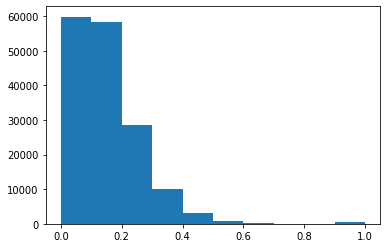

In [26]:
counts, bins = np.histogram(tweet_distance)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

In [27]:
def find_similar_tweet_indexes(distance_matrix, tweet_index: int, threshold: float, k: int = 5):
    assert 0 <= threshold <= 1

    similarities = -distance_matrix[tweet_index,:]
    similarity_indexes = np.argsort(similarities)
    
    found_indexes = []
    for index in similarity_indexes:
        sim = -similarities[index]
        if sim < threshold:
            continue
            
        found_indexes.append((index, sim))
        
    return found_indexes[:k]

In [28]:
for i, sim in find_similar_tweet_indexes(tweet_distance, source_tweet_index, threshold=0.4, k=8):
    print('Similarity:', sim)
    print('text:', df_valid.iloc[i].tweet_text)
    print('-' * 10)

Similarity: 1.0
text: Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
----------
Similarity: 0.5118906968889915
text: Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
----------
Similarity: 0.4850712500726658
text: #sxsw apple store run out for the day :( boo apple.
----------
Similarity: 0.45834924851410563
text: video from the popup Apple store: {link} #sxsw #sxswi
----------
Similarity: 0.4244373438135828
text: #SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
----------
Similarity: 0.40422604172722154
text: Wanting in line at the unconfirmed Apple pop-up store for an iPad 2. #sxsw
----------
